### Data Input

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

header_list = ["label", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", \
               "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", \
               "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", \
               "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

df = pd.read_csv("../dataset/agaricus-lepiota.data", sep=",", names=header_list)
df

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Data Preprocessing

In [72]:
from sklearn.utils import shuffle

# check missing value and drop the feature
df_null = df.isnull()

for colname in df_null:
    find_null = False
    
    for is_null in df_null[colname]:
        if bool(is_null):
            find_null = True
            break
    
    # if there is missing value in column, we drop this column
    if find_null:
        df = df.drop(colname, 1)

# data shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

#bonus: need implemetation

# Transform to the data format that I can process
freq_dict = {}

for colname in df.columns[1:]:
    temp_dict = {}

    for ele in df[colname]:
        if str(ele) in temp_dict:
            temp_dict[str(ele)] += 1
        else:
            temp_dict[str(ele)] = 1
    
    freq_dict[colname] = temp_dict

### Data Visualization

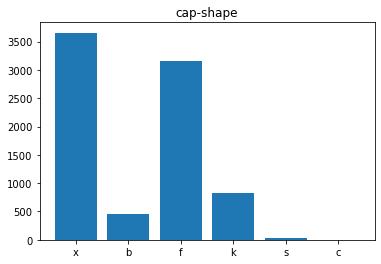

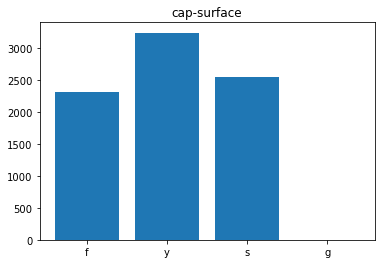

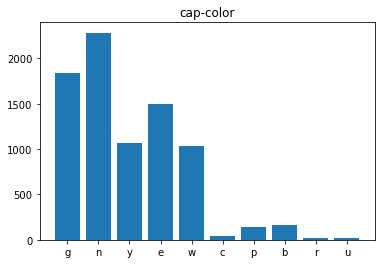

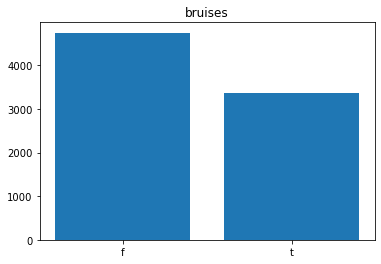

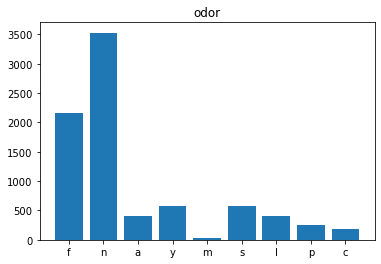

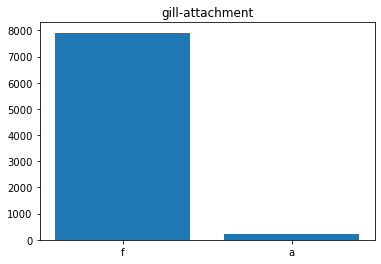

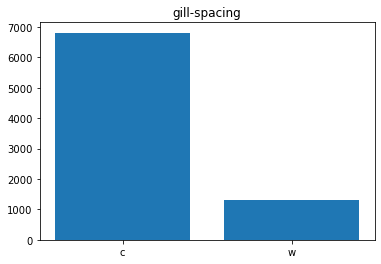

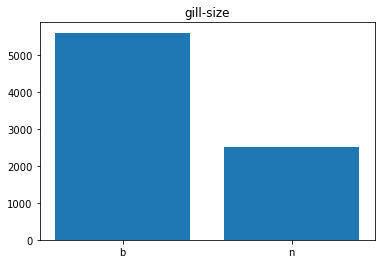

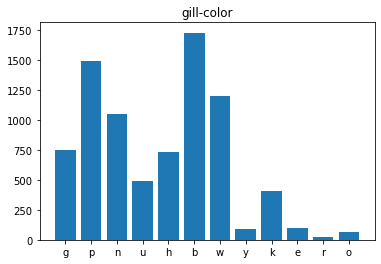

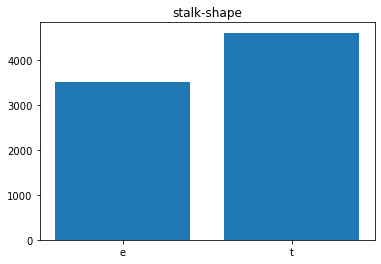

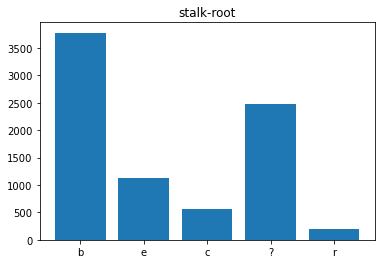

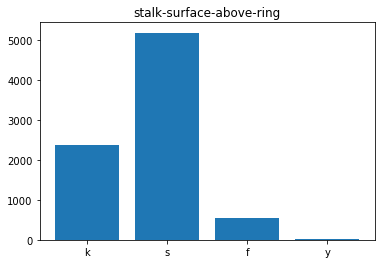

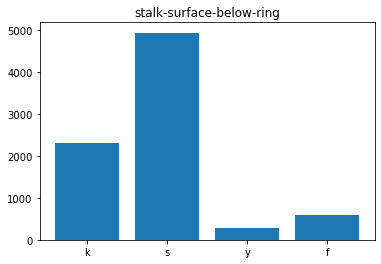

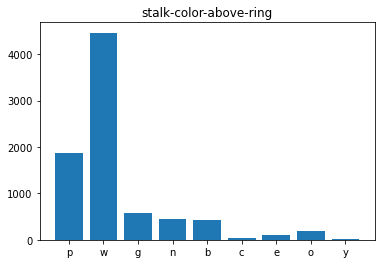

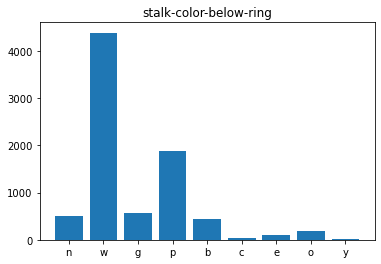

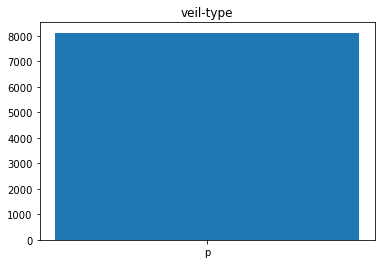

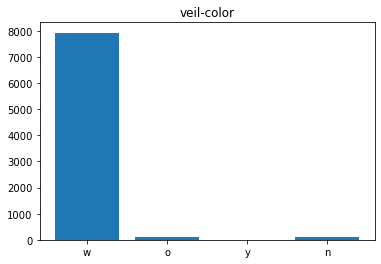

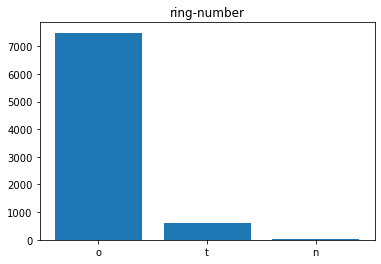

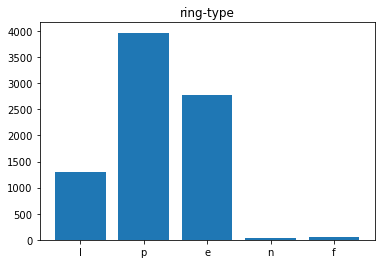

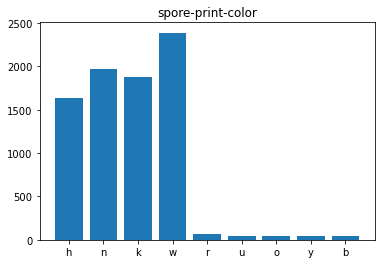

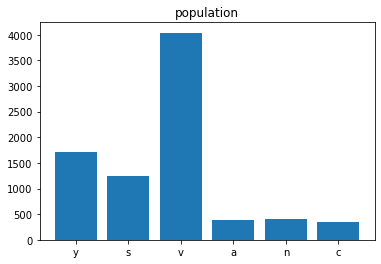

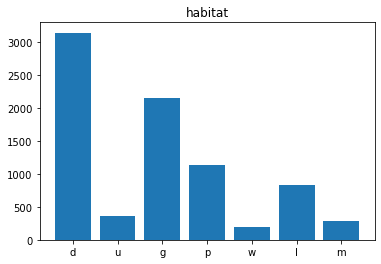

In [84]:
# show data distribution
for colname in df.columns[1:]: 
    plt.title(colname, loc='center')
    
    plt.bar(range(len(freq_dict[colname])), list(freq_dict[colname].values()), align='center')
    plt.xticks(range(len(freq_dict[colname])), list(freq_dict[colname].keys()))
    
    plt.show()

<ipython-input-89-cf40b1ffc27a>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))


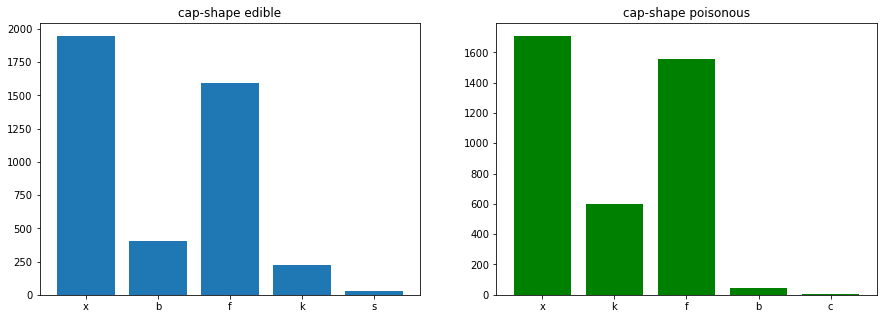

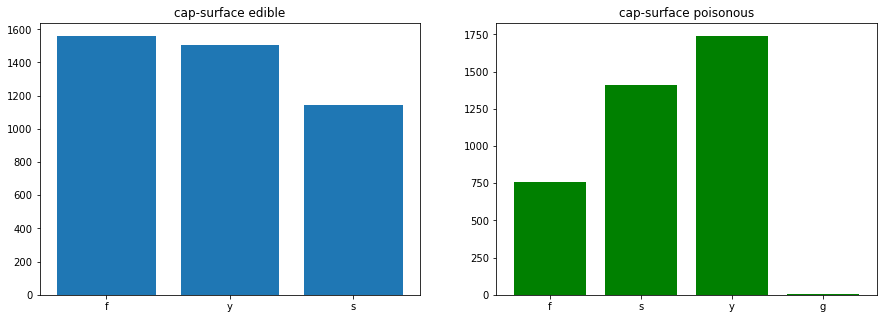

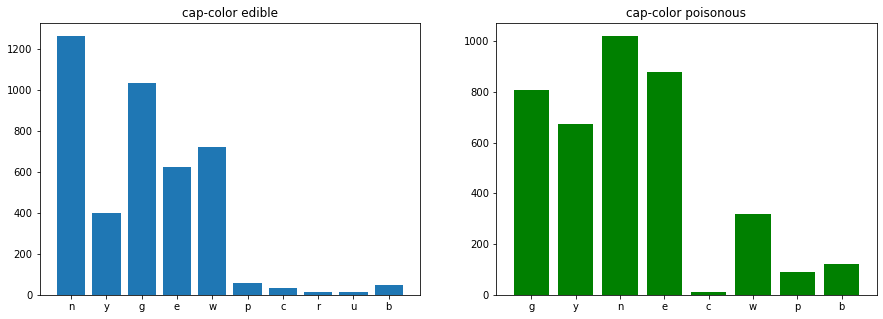

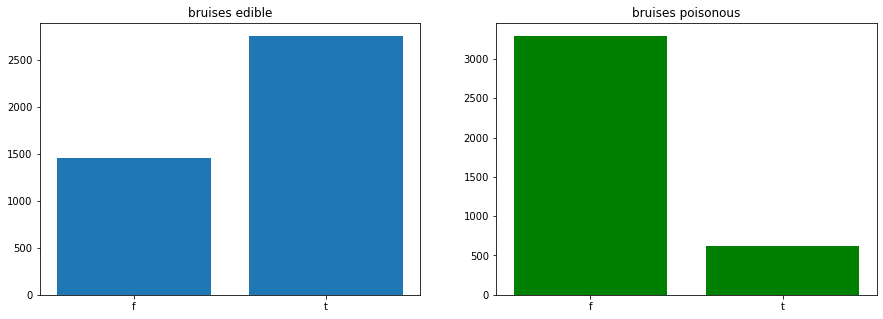

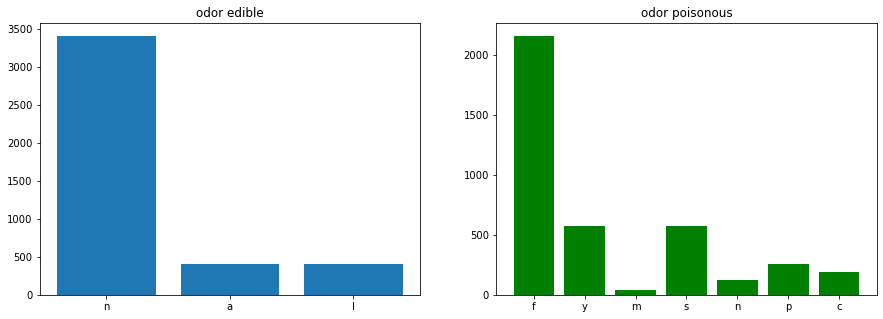

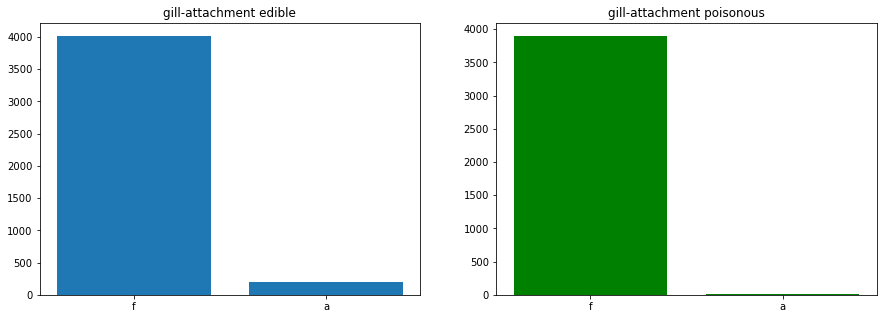

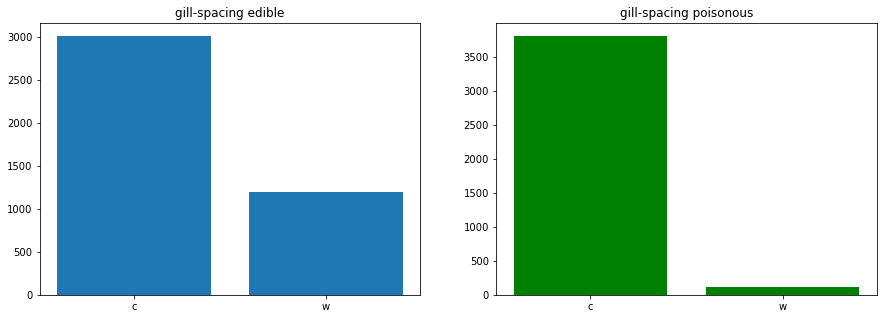

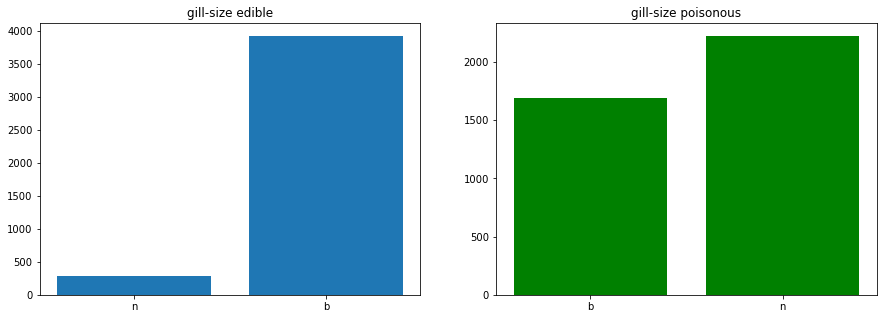

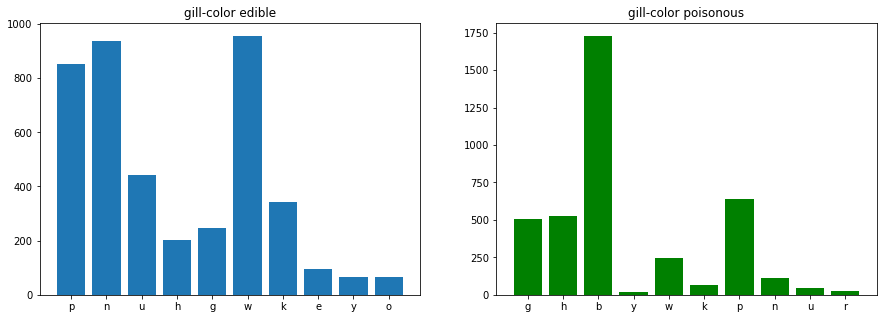

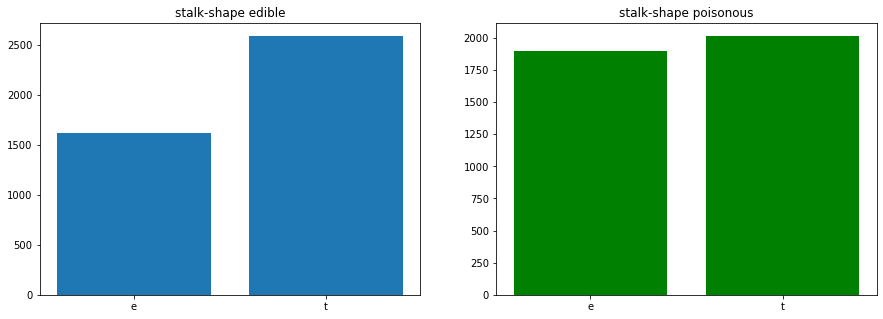

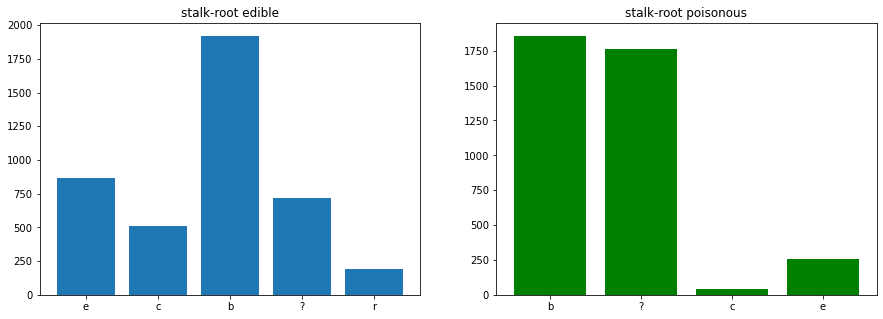

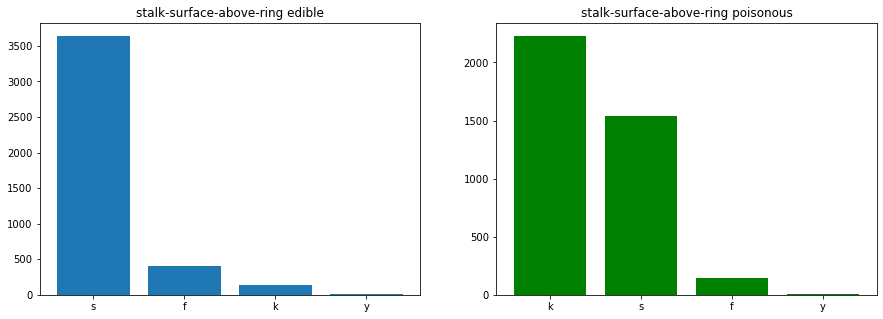

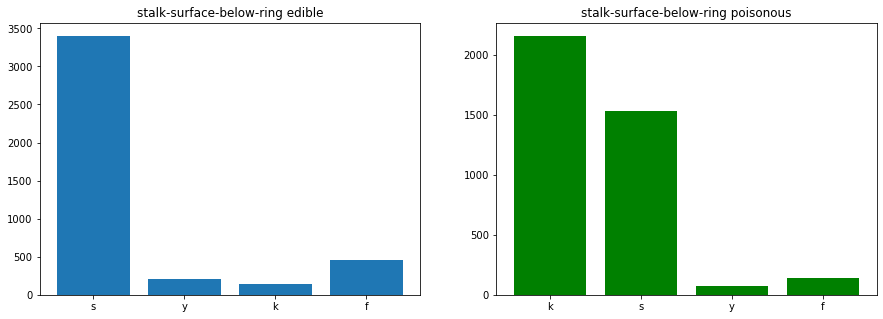

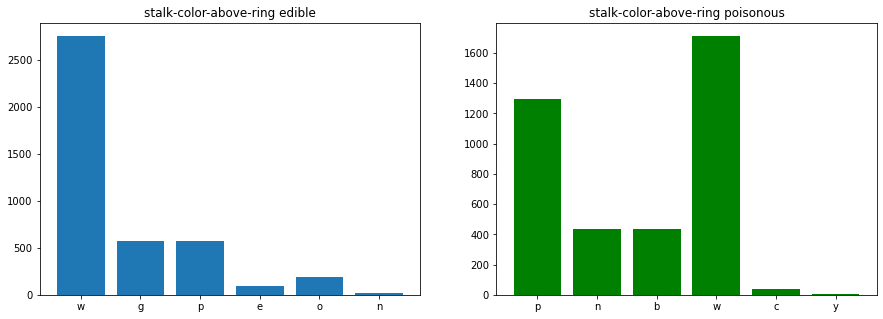

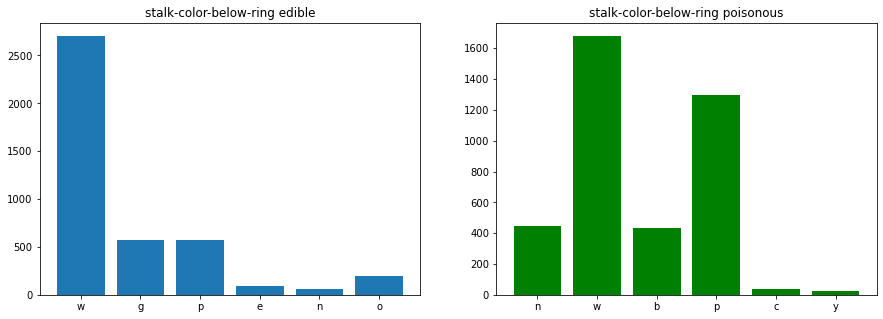

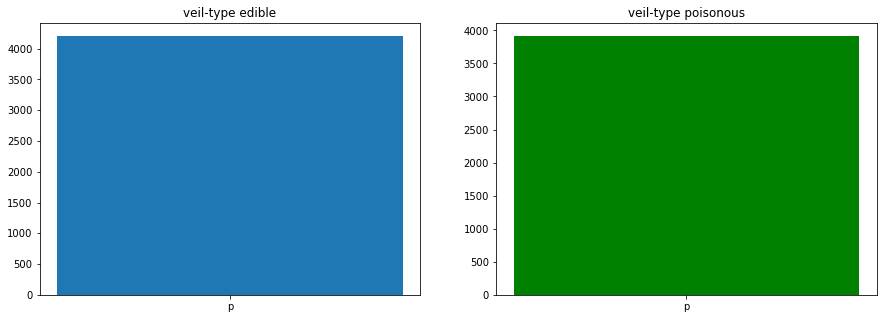

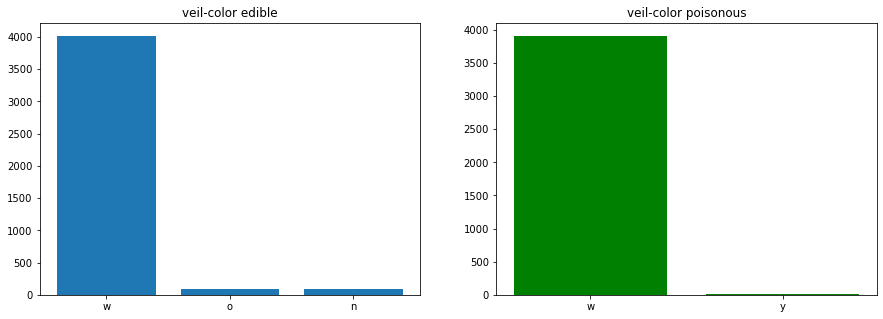

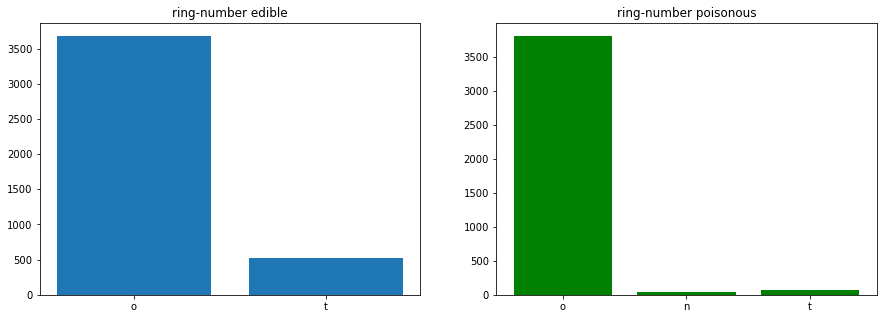

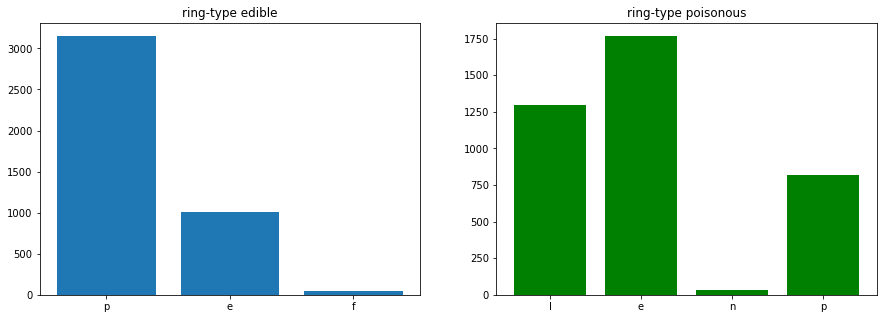

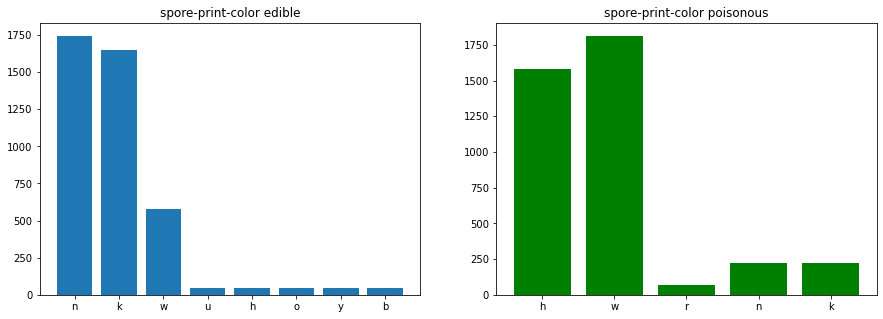

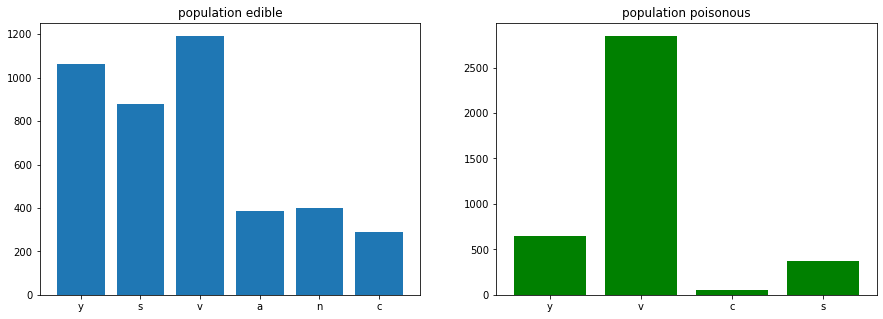

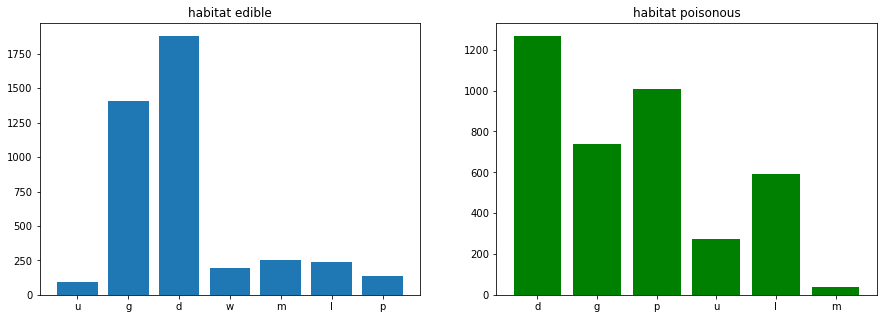

In [89]:
# show data distribution base on target
for colname in df.columns[1:]:
    e_dict = {}
    p_dict = {}
    
    row_index = 0
    
    for ele in df[colname]:
        target = df.iat[row_index, 0]
        row_index += 1
        
        if target == 'e':
            if str(ele) in e_dict:
                e_dict[str(ele)] += 1
            else:
                e_dict[str(ele)] = 1
        else:
            if str(ele) in p_dict:
                p_dict[str(ele)] += 1
            else:
                p_dict[str(ele)] = 1
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.set_title(colname + " edible")
    ax2.set_title(colname + " poisonous")
    ax1.bar(e_dict.keys(), e_dict.values())
    ax2.bar(p_dict.keys(), p_dict.values(), color='green')
   

### Model Implementation

In [75]:
import math

basic_freq_dict = {}
ep_freq_dict = {}
ny_dict = {'e': 0, 'p': 0}

def set_record_dict(training_df):
    # initial all global
    global basic_freq_dict
    global ep_freq_dict
    global ny_dict 
    
    basic_freq_dict = {}
    ep_freq_dict = {}
    ny_dict = {'e': 0, 'p': 0}
    
    for colname in training_df.columns[:]:
        basic_freq_dict[colname] = {}
        
        # calculate ny for targets
        if colname == "label":
            for ele in training_df[colname]:
                ny_dict[ele] += 1
            continue
        
        # calculate other feature base on target
        e_dict = {}
        p_dict = {}

        row_index = 0

        for ele in training_df[colname]:
            target = training_df.iat[row_index, 0]
            row_index += 1
            
            # calculate all possible value in this column
            if str(ele) in basic_freq_dict[colname]:
                basic_freq_dict[colname][str(ele)] += 1
            else:
                basic_freq_dict[colname][str(ele)] = 1

            if target == 'e':
                if str(ele) in e_dict:
                    e_dict[str(ele)] += 1
                else:
                    e_dict[str(ele)] = 1
            else:
                if str(ele) in p_dict:
                    p_dict[str(ele)] += 1
                else:
                    p_dict[str(ele)] = 1
    
        ep_freq_dict[colname] = {'e': e_dict, 'p': p_dict}
    


def get_num_of_data(training_df):
    return len(training_df.index)

def get_py(training_df, target_name):
    count = 0
    for i in training_df["label"]:
        if str(i) == str(target_name):
            count += 1
    n = get_num_of_data(training_df)
    
    return float(count / n)
    

def get_pxiy(training_df, target_name, feature_name, feature_value, k_value):
    if feature_value in ep_freq_dict[feature_name][target_name]:
        nxy = ep_freq_dict[feature_name][target_name][feature_value]
    else: 
        nxy = 0
        
    ny = ny_dict[target_name]
            
    tao = len(basic_freq_dict[colname])
    
    return float((nxy + k_value) / (ny + k_value * tao))

# input dict: key: feature name, value: feature value
def mushroom_NB_divider(training_df, input_dict, is_with_lpsm):
    all_feature_name = training_df.columns[1:] # without label
    all_target_name = ["e", "p"]
    
    max_target_name = ""
    max_target_prob = -1000000
    for target_name in all_target_name:
        py = get_py(training_df, target_name)
        log_py = math.log(py)
        sum_of_log_pxiy = 0
        
        for feature_name in all_feature_name:
            if is_with_lpsm:
                pxiy = get_pxiy(training_df, target_name, feature_name, input_dict[feature_name], 0.1)
            else:
                pxiy = get_pxiy(training_df, target_name, feature_name, input_dict[feature_name], 0)
            
            if pxiy != 0:
                sum_of_log_pxiy += math.log(pxiy)
        
        if log_py + sum_of_log_pxiy > max_target_prob:
            max_target_prob = log_py + sum_of_log_pxiy
            max_target_name = target_name
    
    return max_target_name, max_target_prob

### Train Test Splits - Holdout Validation

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

#split the dataset
training_dataframe = df.iloc[:5686, :]
testing_dataframe = df.iloc[5686:, :]

# Create input data dictionary and predict
with_lpsm_pred = []
without_lpsm_pred = []
answer = []

all_column_name = testing_dataframe.columns[1:] # no label

set_record_dict(training_dataframe)

for index, row in testing_dataframe.iterrows():
    answer.append(row["label"])
    
    input_dict = {}
    for colname in all_column_name:
        input_dict[colname] = row[colname]
    
    res1, _ = mushroom_NB_divider(training_dataframe, input_dict, True)
    with_lpsm_pred.append(res1)
    res2, _ = mushroom_NB_divider(training_dataframe, input_dict, False)
    without_lpsm_pred.append(res2)
    
# get confusion matrix    
with_lpsm_confusion_matrix = confusion_matrix(answer, with_lpsm_pred)
without_lpsm_confusion_matrix = confusion_matrix(answer, without_lpsm_pred)

# get accuracy
with_lpsm_accuracy = accuracy_score(answer, with_lpsm_pred)
without_lpsm_accuracy = accuracy_score(answer, without_lpsm_pred)

#get recall
with_lpsm_recall = recall_score(answer, with_lpsm_pred, average='macro')
without_lpsm_recall = recall_score(answer, without_lpsm_pred, average='macro')

# get precision
with_lpsm_precision = precision_score(answer, with_lpsm_pred, average='macro')
without_lpsm_precision = precision_score(answer, without_lpsm_pred, average='macro')

### Train Test Splits - K-fold Cross-validation

In [82]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)

w_confusion_matrix = []
w_accuracy = []
w_recall = []
w_precision = []

wo_confusion_matrix = []
wo_accuracy = []
wo_recall = []
wo_precision = []

for train_index, test_index in kf.split(df):
    set_record_dict(df.iloc[train_index])
    
    with_lpsm_pred = []
    without_lpsm_pred = []
    answer = []
    
    for index, row in df.iloc[test_index].iterrows():
        answer.append(row["label"])
        
        input_dict = {}
        for colname in all_column_name:
            input_dict[colname] = row[colname]

        res1, _ = mushroom_NB_divider(training_dataframe, input_dict, True)
        with_lpsm_pred.append(res1)
        res2, _ = mushroom_NB_divider(training_dataframe, input_dict, False)
        without_lpsm_pred.append(res2)
    
    w_confusion_matrix.append(np.array(confusion_matrix(answer, with_lpsm_pred)))
    wo_confusion_matrix.append(np.array(confusion_matrix(answer, without_lpsm_pred)))
    w_accuracy.append(accuracy_score(answer, with_lpsm_pred))
    wo_accuracy.append(accuracy_score(answer, without_lpsm_pred))
    w_recall.append(recall_score(answer, with_lpsm_pred, average='macro'))
    wo_recall.append(recall_score(answer, without_lpsm_pred, average='macro'))
    w_precision.append(precision_score(answer, with_lpsm_pred, average='macro'))
    wo_precision.append(precision_score(answer, without_lpsm_pred, average='macro'))
    
final_w_confusion_matrix = np.add(w_confusion_matrix[0], w_confusion_matrix[1])
final_w_confusion_matrix = np.add(final_w_confusion_matrix, w_confusion_matrix[2])
final_wo_confusion_matrix = np.add(wo_confusion_matrix[0], wo_confusion_matrix[1])
final_wo_confusion_matrix = np.add(final_wo_confusion_matrix, wo_confusion_matrix[2])

final_w_confusion_matrix = np.array([[float(y) for y in x] for x in final_w_confusion_matrix])
final_wo_confusion_matrix = np.array([[float(y) for y in x] for x in final_wo_confusion_matrix])

for i in range(len(final_w_confusion_matrix)):
    for j in range(len(final_w_confusion_matrix[i])):
        final_w_confusion_matrix[i][j] = final_w_confusion_matrix[i][j] / 3
        final_wo_confusion_matrix[i][j] = final_wo_confusion_matrix[i][j] / 3


final_w_accuracy = sum(w_accuracy) / 3
final_wo_accuracy = sum(wo_accuracy) / 3
final_w_recall = sum(w_recall) / 3
final_wo_recall = sum(wo_recall) / 3
final_w_precision = sum(w_precision) / 3
final_wo_precision = sum(wo_precision)/ 3

### Result Print

In [83]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Test Type", "Compute Type", "Confusion Matrix", "Accuracy", "Recall", "Precision"]
x.add_row(["Holdout Validation", "With Laplace Smoothing", with_lpsm_confusion_matrix, with_lpsm_accuracy, with_lpsm_recall, with_lpsm_precision])
x.add_row(["Holdout Validation", "Without Laplace Smoothing", without_lpsm_confusion_matrix, without_lpsm_accuracy, without_lpsm_recall, without_lpsm_precision])
x.add_row(["K-fold Cross-validation", "With Laplace Smoothing", final_w_confusion_matrix, final_w_accuracy, final_w_recall, final_w_precision])
x.add_row(["K-fold Cross-validation", "Without Laplace Smoothing", final_wo_confusion_matrix, final_wo_accuracy, final_wo_recall, final_wo_recall])

print(x)

+-------------------------+---------------------------+---------------------------------+--------------------+--------------------+--------------------+
|        Test Type        |        Compute Type       |         Confusion Matrix        |      Accuracy      |       Recall       |     Precision      |
+-------------------------+---------------------------+---------------------------------+--------------------+--------------------+--------------------+
|    Holdout Validation   |   With Laplace Smoothing  |           [[1246    6]          | 0.9749794913863823 | 0.9744166500546849 | 0.9762238911006147 |
|                         |                           |           [  55 1131]]          |                    |                    |                    |
|    Holdout Validation   | Without Laplace Smoothing |           [[1135  117]          | 0.8470057424118129 | 0.8453489593715822 | 0.8521059450952604 |
|                         |                           |           [ 256  930]]    

### Question

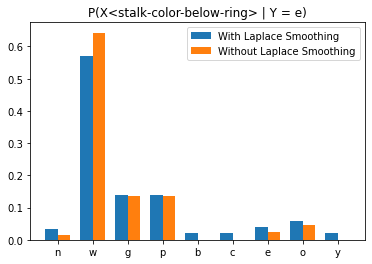

In [81]:
# get all possible value in stalk-color-below-ring feature with target = e

set_record_dict(df)

all_possible = basic_freq_dict["stalk-color-below-ring"].keys()

result_dict = {}
result_dict["With Laplace Smoothing"] = {}
result_dict["Without Laplace Smoothing"] = {}

for value in all_possible:
    result_dict["With Laplace Smoothing"][str(value)] = get_pxiy(df, "e", "stalk-color-below-ring", value, 100)
    result_dict["Without Laplace Smoothing"][str(value)] = get_pxiy(df, "e", "stalk-color-below-ring", value, 0)
    
wl_list = result_dict["With Laplace Smoothing"].values()
wol_list = result_dict["Without Laplace Smoothing"].values()

ind = np.arange(len(wl_list)) 
width = 0.35       
plt.bar(ind, wl_list, width, label='With Laplace Smoothing')
plt.bar(ind + width, wol_list, width,
    label='Without Laplace Smoothing')

plt.title('P(X<stalk-color-below-ring> | Y = e)')

plt.xticks(ind + width / 2, result_dict["With Laplace Smoothing"].keys())
plt.legend(loc='best')
plt.show()